### A program that benchmarks to find a suitable size 'n' for switching $O(n\log n)$ and $O(n^2)$ algorithms.
---
Using this program, 

Generate a dataset of random integers

(Sizes are 10,15,20,25,30,35,40,45,50,60,70,80,90,100,
110,
120,
130,
140,
150)

And for each threshold value for switching sorts 

(10,
15,
20,
25,
30
35
40
45
50
55
60 
70 
80)

Repeat bubble sort , merge sort and hybrid sort specified number of times (here num_runs=1000) and measure their execution time.

The average and standard deviation of these times can be used to plot a statistical graph with *error bars*.  <ins>By observing the relationship between the execution times of bubble sort , merge sort and hybrid sort , it is possible tonarrow down the range of suitable thresholds</ins>.

In this case , regardless of the size of the data set , it is desirable that hybrid sorting has shorter execution time time than O(nlogn) sorting due to its threshold .


In [7]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        isSorted = True
        for j in range(0,n-i-1):
            if arr[j] > arr[j+1]:
                temp = arr[j]
                arr[j] = arr[j+1]
                arr[j+1] = temp
                isSorted = False
        if isSorted == True:
            break
    return arr

def merge_sort(nums):
    def merge(left, right):
        result = []
        i = j = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                result.append(left[i])
                i += 1
            else:
                result.append(right[j])
                j += 1
        result += left[i:]
        result += right[j:]
        return result

    if len(nums) < 2:
        return nums
    mid = len(nums) // 2
    left = merge_sort(nums[:mid])
    right = merge_sort(nums[mid:])

    return merge(left, right)
    

In [10]:
def merge_sort_kai(arr,threshold):
    def merge(left, right):
        result = []
        i = j = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                result.append(left[i])
                i += 1
            else:
                result.append(right[j])
                j += 1
        result += left[i:]
        result += right[j:]
        return result
    if len(arr) < threshold:
        # print("len(arr): ",len(arr)," <= threshold, use bubble sort")
        return bubble_sort(arr)
    else:
        # print("len(arr): ",len(arr)," > threshold, so divide it")
        if len(arr) < 2:
            return arr
        mid = len(arr) // 2
        left = merge_sort_kai(arr[:mid],threshold)
        right = merge_sort_kai(arr[mid:],threshold)

        return merge(left, right)


list1 = [3, -6, 11, 18, 2, -8, 13, 1, 6, -3, 9, 17, -5, 12, 19, -1, 8, 14, 0, 4, -7, 16, -9,-8, 13, 1, 6, -3, 9, 17, -5, 12, 1]
result = merge_sort_kai(list1,30)
print("len(list1): ",len(list1),result)

len(list1):  33 [-9, -8, -8, -7, -6, -5, -5, -3, -3, -1, 0, 1, 1, 1, 2, 3, 4, 6, 6, 8, 9, 9, 11, 12, 12, 13, 13, 14, 16, 17, 17, 18, 19]


In [3]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np


def generate_datasets(sizes):
    datasets = [random.sample(range(-1000, 1000), size) for size in sizes]
    return datasets


def benchmark(datasets,threshold):
    merge_sort_kai_times = []

    for data in datasets:
        start_time = time.perf_counter()
        merge_sort_kai(data.copy(),threshold)
        end_time = time.perf_counter()
        merge_sort_kai_times.append(end_time - start_time)
    return merge_sort_kai_times

def run_multiple_benchmarks(datasets, num_runs,threshold):
    merge_sort_kai_times_matrix = []

    for _ in range(num_runs):
        merge_sort_times = benchmark(datasets,threshold)
        merge_sort_kai_times_matrix.append(merge_sort_times)

    merge_sort_kai_times_mean = np.mean(merge_sort_kai_times_matrix, axis=0)
    merge_sort_kai_times_std = np.std(merge_sort_kai_times_matrix, axis=0)

    return merge_sort_kai_times_mean, merge_sort_kai_times_std

def benchmark2(datasets):
    bubble_sort_times = []
    merge_sort_times = []

    for data in datasets:
        start_time = time.perf_counter()
        bubble_sort(data.copy())
        end_time = time.perf_counter()
        bubble_sort_times.append(end_time - start_time)

        start_time = time.perf_counter()
        merge_sort(data.copy())
        end_time = time.perf_counter()
        merge_sort_times.append(end_time - start_time)

    return bubble_sort_times, merge_sort_times

def run_multiple_benchmarks2(datasets, num_runs):
    bubble_sort_times_matrix = []
    merge_sort_times_matrix = []

    for _ in range(num_runs):
        bubble_sort_times, merge_sort_times = benchmark2(datasets)
        bubble_sort_times_matrix.append(bubble_sort_times)
        merge_sort_times_matrix.append(merge_sort_times)

    bubble_sort_times_mean = np.mean(bubble_sort_times_matrix, axis=0)
    bubble_sort_times_std = np.std(bubble_sort_times_matrix, axis=0)
    merge_sort_times_mean = np.mean(merge_sort_times_matrix, axis=0)
    merge_sort_times_std = np.std(merge_sort_times_matrix, axis=0)

    return bubble_sort_times_mean, bubble_sort_times_std, merge_sort_times_mean, merge_sort_times_std


def plot_results_with_error_bars2(dataset_sizes, bubble_sort_times_mean, bubble_sort_times_std, merge_sort_times_mean, merge_sort_times_std,merge_sort_kai_times_mean, merge_sort_kai_times_std,threshold):
    fig, ax = plt.subplots(facecolor="w")


    ax.errorbar(dataset_sizes, merge_sort_kai_times_mean, yerr=merge_sort_kai_times_std, marker=',', linestyle='--', color='g', label="Hybrid sort ", capsize=4)
    ax.errorbar(dataset_sizes, bubble_sort_times_mean, yerr=bubble_sort_times_std, marker='o', linestyle='--', color='r', label="Bubble sort " r'$O(n^2)$', capsize=4)
    ax.errorbar(dataset_sizes, merge_sort_times_mean, yerr=merge_sort_times_std, marker='x', linestyle='--', color='b', label="Merge sort " r'$O(n\log n)$', capsize=4)

    ax.set_title("threshold:"+str(threshold))
    ax.set_xlabel("Dataset size")
    ax.set_ylabel("Elapsed time [s]", style="italic")
    plt.ylim(0, 0.0003)
    plt.xticks(dataset_sizes,rotation=45)
    
    plt.legend(loc="upper left")
    plt.show()



As can be seen from the graph , if the threshold is too small , hybrid sorting tends to become unstable . In addition , setting a smaller threshold makes hybrid sorting unnecessary .

When the range of thresholds is from 15 to 25 most often ,
the running time of Hybrid Sort is less than Merge Sort. After 45 ,
the running time becomes in between Bubble Sort and Merge Sort.
Therefore it seems good that Threshold should be between 15-25.

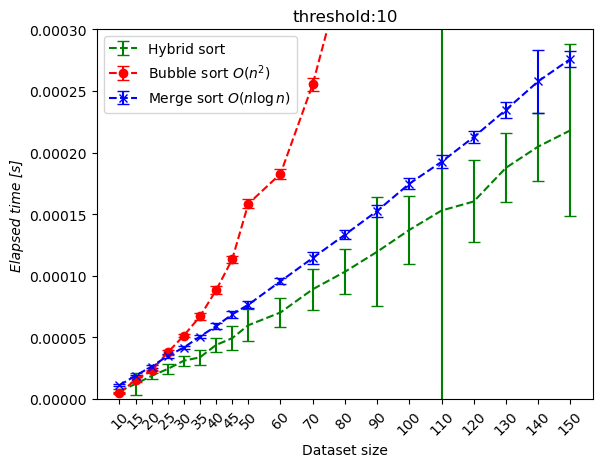

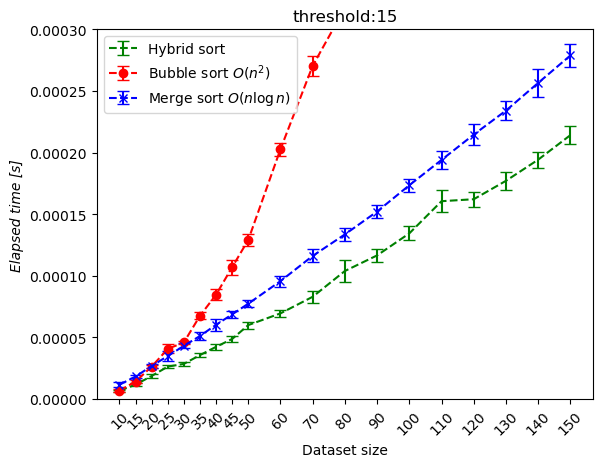

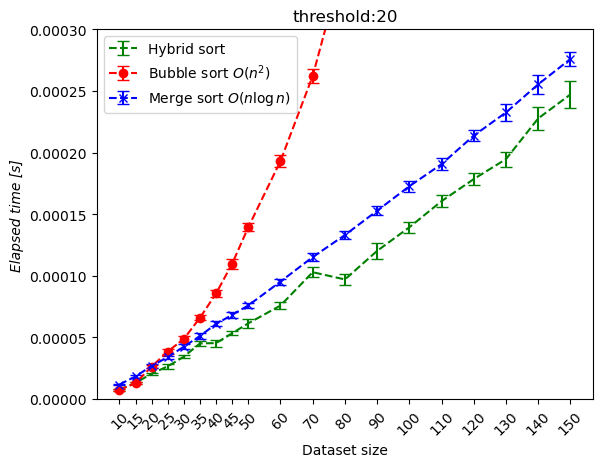

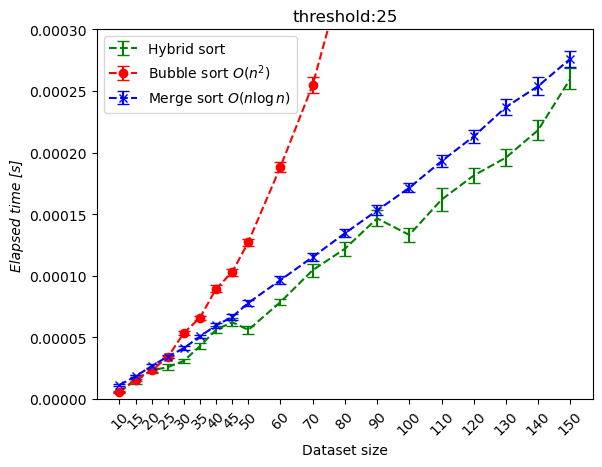

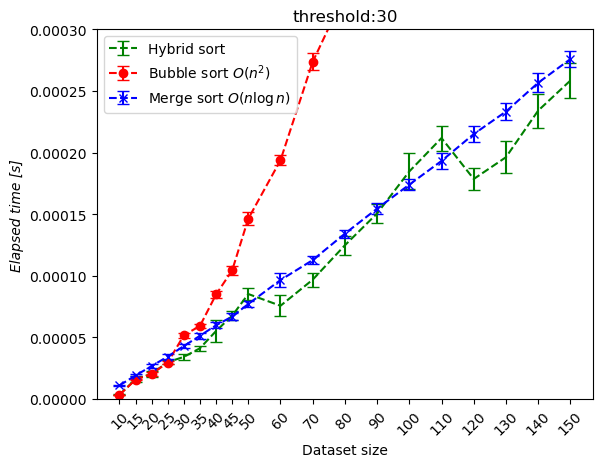

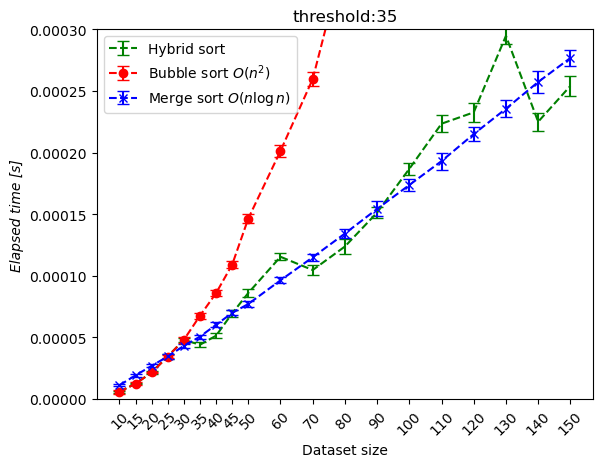

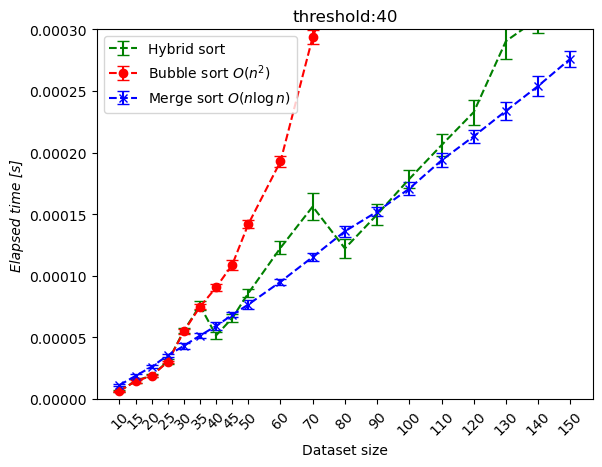

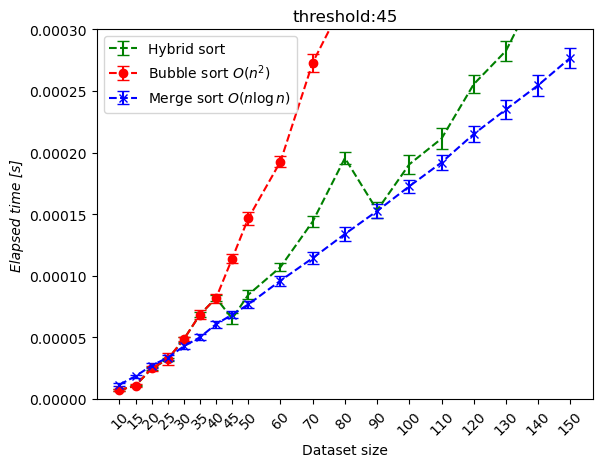

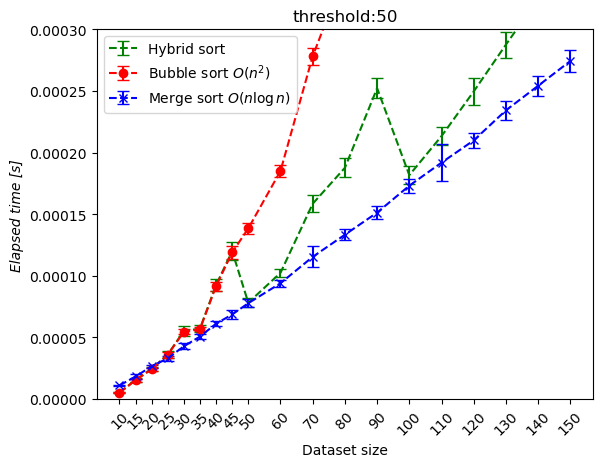

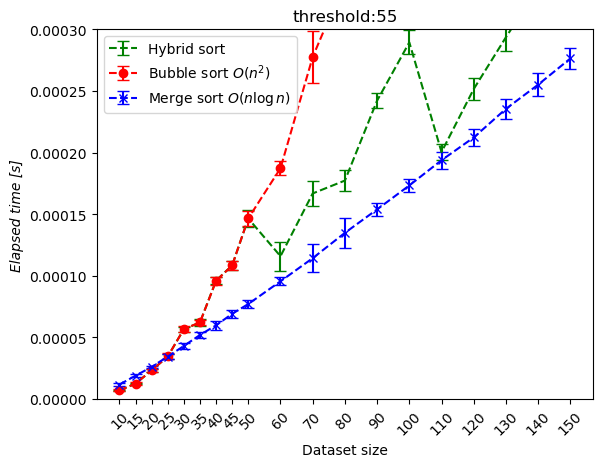

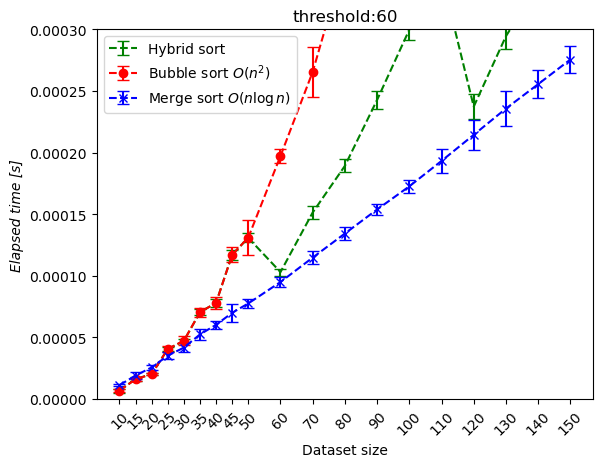

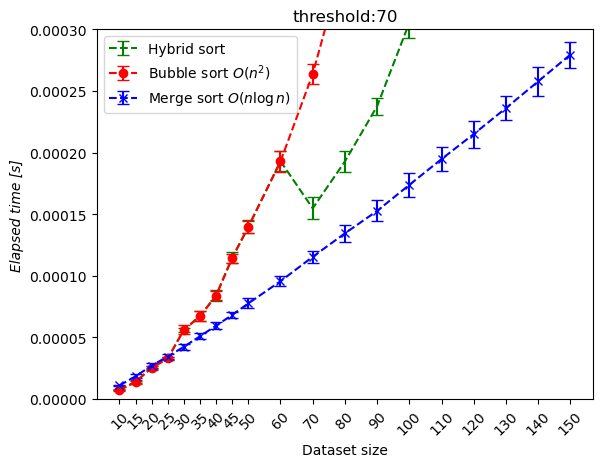

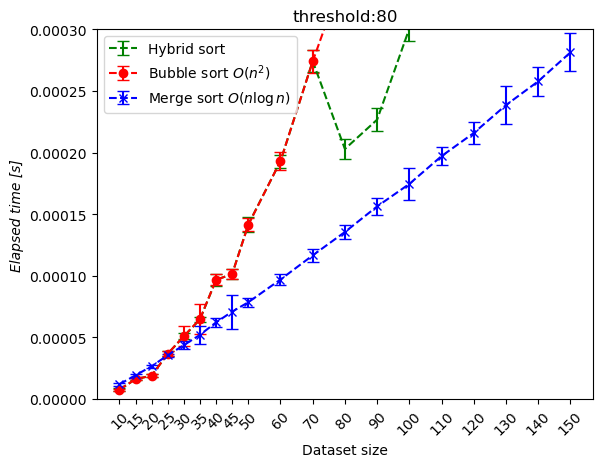

In [5]:
def main2():
    dataset_sizes = [10,15,20,25,30,35,40,45,50,60,70,80,90,100,110,120,130,140,150]
    thresholds = [10,15,20,25,30,35,40,45,50,55,60,70,80]

    for _,threshold in enumerate(thresholds):
        datasets = generate_datasets(dataset_sizes)
        num_runs = 1000
        merge_sort_kai_times_mean, merge_sort_kai_times_std = run_multiple_benchmarks(datasets, num_runs,threshold)
        bubble_sort_times_mean, bubble_sort_times_std, merge_sort_times_mean, merge_sort_times_std = run_multiple_benchmarks2(datasets, num_runs)
        plot_results_with_error_bars2(dataset_sizes, bubble_sort_times_mean, bubble_sort_times_std, merge_sort_times_mean, merge_sort_times_std,merge_sort_kai_times_mean,merge_sort_kai_times_std,threshold)


if __name__ == "__main__":
    main2()